In [ ]:
"""
    load_data.ipynb
    Author: Anuvrat, Deepak, Noah
    Date: 24th July 2024
    Purpose: Load input files for further processing

    Github ticket: NA
"""

### Load Libraries

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import OneHotEncoder

In [91]:
# Define common variables
# if you are downloading the SAS format file from CDC website then use this path
brfss2022_sas_file = '../../LLCP2022.XPT'
# BRFSS file already downloaded and saved as pkl in the repository
brfss2022_sas_file_pkl='../data/BRFSS2022_raw.pkl'

In [90]:
# Display all columns
pd.options.display.max_columns = None
pd.options.display.max_rows = None

### Load BRFSS 2022 file

In [87]:
# Read the raw SAS file
#df_BRFSS2022_raw=pd.read_sas(brfss2022_sas_file, format='xport', encoding='utf-8')
# Save the raw data to a pickle file
#df_BRFSS2022_raw.to_pickle(brfss2022_sas_file_pkl)

In [88]:
# Load the pickle file
df_BRFSS2022_raw= pd.read_pickle(brfss2022_sas_file_pkl)

In [89]:
len(df_BRFSS2022_raw.columns)

328

##### Exploring various columns

In [92]:
potential_features_Xy=['_STATE', 'DISPCODE', 'PVTRESD1', 'COLGHOUS', 'NUMADULT', 'CADULT1', 'PVTRESD3', 'CCLGHOUS', 'SEXVAR',
                  'GENHLTH', 'PHYSHLTH', 'MENTHLTH', 'POORHLTH', 'PRIMINSR', 'PERSDOC3', 'MEDCOST1', 'CHECKUP1',
                    'EXERANY2', 'SLEPTIM1', 'CVDINFR4', 'CVDCRHD4', 'CVDSTRK3', 'ASTHMA3', 'ASTHNOW', 'CHCSCNC1',
                    'CHCOCNC1', 'CHCCOPD3', 'ADDEPEV3', 'CHCKDNY2', 'HAVARTH4', 'DIABETE4', 'DIABAGE4', 'MARITAL', 'EDUCA',
                    'RENTHOM1', 'VETERAN3', 'EMPLOY1', 'CHILDREN', 'INCOME3', 'PREGNANT', 'WEIGHT2', 'HEIGHT3', 'DEAF',
                    'BLIND', 'DECIDE', 'DIFFWALK', 'DIFFDRES', 'DIFFALON', 'SMOKE100', 'SMOKDAY2', 'STOPSMK2', 'LASTSMK2',
                    'USENOW3', 'ECIGNOW2', 'LCSFIRST', 'LCSLAST', 'LCSNUMCG', 'ALCDAY4', 'AVEDRNK3', 'DRNK3GE5', 'MAXDRNKS',
                    'COVIDPOS', 'COVIDSMP', 'PREDIAB2', 'DIABTYPE', 'TOLDCFS', 'HAVECFS', 'WORKCFS', 'COPDSMOK', 'CNCRDIFF',
                    'CNCRAGE', 'LSATISFY', 'EMTSUPRT', 'SDHISOLT', 'SDHEMPLY', 'FOODSTMP', 'SDHFOOD1', 'SDHBILLS', 'SDHUTILS',
                    'SDHTRNSP', 'SDHSTRE1', 'BIRTHSEX', 'RRCLASS3', 'QSTLANG', '_METSTAT', '_URBSTAT', '_IMPRACE', '_RFHLTH',
                    '_PHYS14D', '_MENT14D', '_HLTHPLN', '_HCVU652', '_TOTINDA', '_EXTETH3', '_ALTETH3', '_MICHD', '_LTASTH1',
                    '_CASTHM1', '_ASTHMS1', '_DRDXAR2', '_PRACE2', '_MRACE2', '_HISPANC', '_RACE1', '_RACEG22', '_RACEGR4',
                    '_RACEPR1', '_SEX', '_AGEG5YR', '_AGE80', 'HTM4', 'WTKG3', '_BMI5', '_BMI5CAT', '_RFBMI5', '_CHLDCNT', '_EDUCAG',
                    '_INCOMG1', '_SMOKER3', '_YRSSMOK', '_PACKDAY', '_PACKYRS', '_YRSQUIT', '_SMOKGRP', '_RFBING6', '_DRNKWK2',
                    '_RFDRHV8']

In [93]:
df_BRFSS2022_raw[potential_features_Xy].sample(10)

,_STATE,DISPCODE,PVTRESD1,COLGHOUS,NUMADULT,CADULT1,PVTRESD3,CCLGHOUS,SEXVAR,GENHLTH,PHYSHLTH,MENTHLTH,POORHLTH,PRIMINSR,PERSDOC3,MEDCOST1,CHECKUP1,EXERANY2,SLEPTIM1,CVDINFR4,CVDCRHD4,CVDSTRK3,ASTHMA3,ASTHNOW,CHCSCNC1,CHCOCNC1,CHCCOPD3,ADDEPEV3,CHCKDNY2,HAVARTH4,DIABETE4,DIABAGE4,MARITAL,EDUCA,RENTHOM1,VETERAN3,EMPLOY1,CHILDREN,INCOME3,PREGNANT,WEIGHT2,HEIGHT3,DEAF,BLIND,DECIDE,DIFFWALK,DIFFDRES,DIFFALON,SMOKE100,SMOKDAY2,STOPSMK2,LASTSMK2,USENOW3,ECIGNOW2,LCSFIRST,LCSLAST,LCSNUMCG,ALCDAY4,AVEDRNK3,DRNK3GE5,MAXDRNKS,COVIDPOS,COVIDSMP,PREDIAB2,DIABTYPE,TOLDCFS,HAVECFS,WORKCFS,COPDSMOK,CNCRDIFF,CNCRAGE,LSATISFY,EMTSUPRT,SDHISOLT,SDHEMPLY,FOODSTMP,SDHFOOD1,SDHBILLS,SDHUTILS,SDHTRNSP,SDHSTRE1,BIRTHSEX,RRCLASS3,QSTLANG,_METSTAT,_URBSTAT,_IMPRACE,_RFHLTH,_PHYS14D,_MENT14D,_HLTHPLN,_HCVU652,_TOTINDA,_EXTETH3,_ALTETH3,_MICHD,_LTASTH1,_CASTHM1,_ASTHMS1,_DRDXAR2,_PRACE2,_MRACE2,_HISPANC,_RACE1,_RACEG22,_RACEGR4,_RACEPR1,_SEX,_AGEG5YR,_AGE80,HTM4,WTKG3,_BMI5,_BMI5CAT,_RFBMI5,_CHLDCNT,_EDUCAG,_INCOMG1,_SMOKER3,_YRSSMOK,_PACKDAY,_PACKYRS,_YRSQUIT,_SMOKGRP,_RFBING6,_DRNKWK2,_RFDRHV8
408995,53.0,1200.0,NaN,NaN,NaN,1.0,1.0,NaN,2.0,1.0,88.0,10.0,5.0,2.0,1.0,1.0,3.0,1.0,9.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,NaN,6.0,6.0,1.0,2.0,1.0,88.0,4.0,2.0,155.0,506.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN,NaN,NaN,3.0,1.0,NaN,NaN,NaN,202.0,1.0,88.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,NaN,2.0,2.0,2.0,1.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,2.0,4.0,38.0,168.0,7031.0,2502.0,3.0,2.0,1.0,4.0,2.0,4.0,NaN,NaN,NaN,NaN,4.0,1.0,4.700000e+01,1.0
218221,29.0,1100.0,NaN,NaN,NaN,1.0,1.0,NaN,2.0,5.0,20.0,5.0,30.0,10.0,2.0,2.0,1.0,1.0,3.0,2.0,1.0,2.0,2.0,NaN,2.0,1.0,2.0,2.0,2.0,1.0,3.0,NaN,1.0,5.0,2.0,2.0,5.0,4.0,77.0,2.0,230.0,504.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,3.0,4.0,15.0,NaN,20.0,888.0,NaN,NaN,NaN,2.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,2.0,32.0,3.0,3.0,3.0,2.0,2.0,5.0,2.0,2.0,2.0,1.0,NaN,NaN,1.0,2.0,1.0,1.0,2.0,3.0,2.0,1.0,1.0,1.0,2.0,NaN,1.0,1.0,1.0,3.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,2.0,5.0,40.0,163.0,10433.0,3948.0,4.0,2.0,5.0,3.0,9.0,1.0,25.0,1.0,25.0,NaN,1.0,1.0,5.397605e-79,1.0
240278,33.0,1100.0,1.0,NaN,1.0,NaN,NaN,NaN,2.0,3.0,88.0,88.0,NaN,3.0,1.0,2.0,1.0,2.0,6.0,2.0,2.0,2.0,2.0,NaN,2.0,2.0,2.0,2.0,2.0,2.0,1.0,35.0,2.0,3.0,2.0,2.0,8.0,88.0,77.0,NaN,140.0,503.0,2.0,2.0,2.0,1.0,2.0,7.0,2.0,NaN,NaN,NaN,3.0,1.0,NaN,NaN,NaN,888.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,4.0,2.0,2.0,5.0,2.0,2.0,2.0,4.0,NaN,NaN,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,9.0,2.0,2.0,2.0,2.0,1.0,1.0,3.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,2.0,13.0,80.0,160.0,6350.0,2480.0,2.0,1.0,1.0,1.0,9.0,4.0,NaN,NaN,NaN,NaN,4.0,1.0,5.397605e-79,1.0
292051,39.0,1100.0,NaN,NaN,NaN,1.0,1.0,NaN,2.0,5.0,10.0,10.0,10.0,1.0,2.0,2.0,1.0,2.0,7.0,2.0,2.0,2.0,2.0,NaN,2.0,2.0,2.0,1.0,2.0,1.0,1.0,40.0,1.0,5.0,1.0,2.0,8.0,88.0,6.0,NaN,300.0,507.0,2.0,2.0,1.0,1.0,2.0,1.0,2.0,NaN,NaN,NaN,3.0,1.0,NaN,NaN,NaN,201.0,1.0,88.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,NaN,2.0,1.0,1.0,3.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,2.0,8.0,57.0,170.0,13608.0,4699.0,4.0,2.0,1.0,3.0,4.0,4.0,NaN,NaN,NaN,NaN,4.0,1.0,2.300000e+01,1.0
398853,53.0,1100.0,NaN,NaN,NaN,1.0,1.0,NaN,2.0,1.0,88.0,88.0,NaN,77.0,2.0,2.0,1.0,2.0,6.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,3.0,NaN,6.0,4.0,3.0,2.0,1.0,3.0,77.0,2.0,115.0,502.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN,NaN,NaN,3.0,2.0,NaN,NaN,NaN,888.0,NaN,NaN,NaN,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,5.0,1.0,2.0,5.0,2.0,2.0,2.0,2.0,NaN,NaN,1.0,1.0,1.0,5.0,1.0,1.0,1.0,9.0,9.0,2.0,2.0,NaN,2.0,2.0,1.0,2.0,2.0,1.0,1.0,1.0,8.0,2.0,5.0,7.0,2.0,1.0,18.0,157.0,5216.0,2103.0,2.0,1.0,4.0,2.0,9.0,4.0,NaN,NaN,NaN,NaN,4.0,1.0,5.397605e-79,1.0
58376,10.0,1100.0,NaN,NaN,NaN,1.0,1.0,NaN,1.0,1.0,88.0,88.0,NaN,3.0,1.0,2.0,1.0,1.0,7.0,2.0,2.0,2.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,3.0,NaN,2.0,6.0,1.0,2.0,7.0,88.0,7.0

In [94]:
# Keep only features that can be potentially included in the model. 
# Other features eliminated based on initial analysis using intuition and the codebook
df_Xy_potential=df_BRFSS2022_raw[potential_features_Xy]

In [95]:
# Check missing values and export a CSV file to drop features based on missing values
missing_values=pd.DataFrame({'missing':df_Xy_potential.isna().sum(), 
                             'per_missing':df_Xy_potential.isna().sum()/df_Xy_potential.shape[0]}).reset_index()

missing_values.to_csv('../data/missing_values.csv', index=False)

In [96]:
selected_features_Xy=['GENHLTH', 'PHYSHLTH', 'MENTHLTH', 'PERSDOC3', 'MEDCOST1', 'CHECKUP1', 'SLEPTIM1', 
                        'CVDINFR4', 'CVDCRHD4', 'CVDSTRK3', 'CHCOCNC1', 'CHCCOPD3', 'ADDEPEV3', 'CHCKDNY2', 'DIABETE4', 'MARITAL', 
                        'EDUCA', 'RENTHOM1', 'VETERAN3', 'EMPLOY1', 'CHILDREN', 'INCOME3', 'DECIDE', 'DIFFALON', 'SMOKE100', 
                        'COVIDPOS', 'PREDIAB2', 'CNCRDIFF', 'LSATISFY', 'EMTSUPRT', 'SDHISOLT', 'SDHEMPLY', 
                        'FOODSTMP', 'SDHFOOD1', 'SDHBILLS', 'SDHUTILS', 'SDHTRNSP', 'SDHSTRE1', 'QSTLANG', '_METSTAT', '_URBSTAT', 
                        '_HLTHPLN', '_TOTINDA', '_ASTHMS1', '_DRDXAR2', '_RACEPR1', 
                        '_SEX', '_AGE80', 'HTM4', 'WTKG3', '_BMI5', '_BMI5CAT', '_SMOKER3', '_YRSSMOK', '_SMOKGRP', '_RFBING6', '_DRNKWK2', '_RFDRHV8']

dropped_feature_Xy_secondcut=['PRIMINSR', 'EXERANY2', 'LCSFIRST', 'LCSLAST', '_RFHLTH', '_PHYS14D', '_MENT14D', '_RFBMI5', '_CHLDCNT', '_EDUCAG']

In [97]:
# Selecting only those records which have presence or absence information for heart related diseases (Heart Attack)
df_Xy_selected=df_Xy_potential[selected_features_Xy]
df_Xy_selected=df_Xy_selected[df_Xy_selected['CVDINFR4'].isin([1, 2])] #CVDCRHD4, CVDSTRK3

In [98]:
df_Xy_potential.shape, df_Xy_selected.shape

((445132, 127), (442067, 58))

#### Treatment of missing and other coded values (77, 88, 99, 9, etc.)

In [99]:
# Setting 88 to 0 and calculating the means
df_Xy_selected.PHYSHLTH=np.where(df_Xy_selected.PHYSHLTH.isin([88]), 0, df_Xy_selected.PHYSHLTH)
mean_PHYSHLTH=df_Xy_selected[~((df_Xy_selected.PHYSHLTH.isna()) | (df_Xy_selected.PHYSHLTH.isin([77, 99])))]['PHYSHLTH'].mean()
df_Xy_selected.MENTHLTH=np.where(df_Xy_selected.MENTHLTH.isin([88]), 0, df_Xy_selected.MENTHLTH)
mean_MENTHLTH=df_Xy_selected[~((df_Xy_selected.MENTHLTH.isna()) | (df_Xy_selected.MENTHLTH.isin([77, 99])))]['MENTHLTH'].mean()

In [100]:
# Treatment of missing values
df_Xy_selected.PHYSHLTH=np.where(df_Xy_selected.PHYSHLTH.isin([77, 99]), mean_PHYSHLTH, df_Xy_selected.PHYSHLTH) # 88 = None, 77 = Don't know/Not sure, 99 = Refused
df_Xy_selected.MENTHLTH=np.where(df_Xy_selected.MENTHLTH.isin([77, 99]), mean_MENTHLTH, df_Xy_selected.MENTHLTH) # 88 = None, 77 = Don't know/Not sure, 99 = Refused
df_Xy_selected.CHILDREN=np.where(((df_Xy_selected.CHILDREN.isna()) | (df_Xy_selected.CHILDREN.isin([88, 99]))), 0, df_Xy_selected.CHILDREN) # 88 = None, 99 = Refused
df_Xy_selected.INCOME3=np.where(((df_Xy_selected.INCOME3.isna()) | (df_Xy_selected.INCOME3.isin([77, 99]))), 6, df_Xy_selected.INCOME3) # 77 = Don't know/Not sure, 99 = Refused
df_Xy_selected.DECIDE=np.where(((df_Xy_selected.DECIDE.isna()) | (df_Xy_selected.DECIDE.isin([7, 9]))), 2, df_Xy_selected.DECIDE) # 7 = Don't know/Not sure, 9 = Refused
df_Xy_selected.DIFFALON=np.where(((df_Xy_selected.DIFFALON.isna()) | (df_Xy_selected.DIFFALON.isin([7, 9]))), 2, df_Xy_selected.DIFFALON) # 7 = Don't know/Not sure, 9 = Refused
df_Xy_selected.PREDIAB2=np.where(((df_Xy_selected.PREDIAB2.isna()) | (df_Xy_selected.PREDIAB2.isin([7, 9]))), 3, df_Xy_selected.PREDIAB2) # 7 = Don't know/Not sure, 9 = Refused
df_Xy_selected.CNCRDIFF=np.where(((df_Xy_selected.CNCRDIFF.isna()) | (df_Xy_selected.CNCRDIFF.isin([7, 9]))), 0, df_Xy_selected.CNCRDIFF) # 7 = Don't know/Not sure, 9 = Refused
df_Xy_selected._HLTHPLN=np.where(((df_Xy_selected._HLTHPLN.isin([9]))), 1, df_Xy_selected._HLTHPLN) # 9 = Don´t know, refused or missing
df_Xy_selected._YRSSMOK=np.where(((df_Xy_selected._SMOKER3.isin([4]))), 0, df_Xy_selected._YRSSMOK) # Never smoked would have 0 smoking years. However, YRSSMOK and SDOH features are missing for the same records. There is potential for some bias here.


In [101]:
# Dropping records with missing values
df_nona=df_Xy_selected[~(
    (df_Xy_selected._RFDRHV8.isin([9])) |
    (df_Xy_selected._DRNKWK2.isin([99900])) |
    (df_Xy_selected._RFBING6.isin([9])) |
    (df_Xy_selected._SMOKGRP.isna()) |
    (df_Xy_selected._YRSSMOK.isna()) |
    (df_Xy_selected._SMOKER3.isin([9])) |
    (df_Xy_selected._BMI5CAT.isna()) |
    (df_Xy_selected._BMI5.isna()) |
    (df_Xy_selected.WTKG3.isna()) |
    (df_Xy_selected.HTM4.isna()) |
    (df_Xy_selected._AGE80.isna()) |
    (df_Xy_selected._SEX.isna()) |
    (df_Xy_selected._RACEPR1.isna()) |
    (df_Xy_selected._DRDXAR2.isna()) |
    (df_Xy_selected._ASTHMS1.isin([9])) |
    (df_Xy_selected._TOTINDA.isin([9])) |
    (df_Xy_selected._HLTHPLN.isin([9])) |
    (df_Xy_selected._URBSTAT.isna()) |
    (df_Xy_selected._METSTAT.isna()) |
    (df_Xy_selected.QSTLANG.isna()) |
    (df_Xy_selected.SDHSTRE1.isna()) | (df_Xy_selected.SDHSTRE1.isin([7, 9])) |
    (df_Xy_selected.SDHTRNSP.isna()) | (df_Xy_selected.SDHTRNSP.isin([7, 9])) |
    (df_Xy_selected.SDHUTILS.isna()) | (df_Xy_selected.SDHUTILS.isin([7, 9])) |
    (df_Xy_selected.SDHBILLS.isna()) | (df_Xy_selected.SDHBILLS.isin([7, 9])) |
    (df_Xy_selected.SDHFOOD1.isna()) | (df_Xy_selected.SDHFOOD1.isin([7, 9])) |
    (df_Xy_selected.FOODSTMP.isna()) | (df_Xy_selected.FOODSTMP.isin([7, 9])) |
    (df_Xy_selected.SDHEMPLY.isna()) | (df_Xy_selected.SDHEMPLY.isin([7, 9])) |
    (df_Xy_selected.SDHISOLT.isna()) | (df_Xy_selected.SDHISOLT.isin([7, 9])) |
    (df_Xy_selected.EMTSUPRT.isna()) | (df_Xy_selected.EMTSUPRT.isin([7, 9])) |
    (df_Xy_selected.LSATISFY.isna()) | (df_Xy_selected.LSATISFY.isin([7, 9])) |
    (df_Xy_selected.CNCRDIFF.isna()) | (df_Xy_selected.CNCRDIFF.isin([7, 9])) |
    (df_Xy_selected.PREDIAB2.isna()) | (df_Xy_selected.PREDIAB2.isin([7, 9])) |
    (df_Xy_selected.COVIDPOS.isna()) | (df_Xy_selected.COVIDPOS.isin([7, 9])) |
    (df_Xy_selected.SMOKE100.isna()) | (df_Xy_selected.SMOKE100.isin([7, 9])) |
    (df_Xy_selected.DIFFALON.isna()) | (df_Xy_selected.DIFFALON.isin([7, 9])) |
    (df_Xy_selected.DECIDE.isna()) | (df_Xy_selected.DECIDE.isin([7, 9])) |
    (df_Xy_selected.INCOME3.isna()) | (df_Xy_selected.INCOME3.isin([77, 99])) |
    (df_Xy_selected.CHILDREN.isna()) | (df_Xy_selected.CHILDREN.isin([99])) |
    (df_Xy_selected.EMPLOY1.isna()) | (df_Xy_selected.EMPLOY1.isin([9])) |
    (df_Xy_selected.VETERAN3.isna()) | (df_Xy_selected.VETERAN3.isin([7, 9])) |
    (df_Xy_selected.RENTHOM1.isna()) | (df_Xy_selected.RENTHOM1.isin([7, 9])) |
    (df_Xy_selected.EDUCA.isna()) | (df_Xy_selected.EDUCA.isin([9])) |
    (df_Xy_selected.MARITAL.isna()) | (df_Xy_selected.MARITAL.isin([9])) |
    (df_Xy_selected.DIABETE4.isna()) | (df_Xy_selected.DIABETE4.isin([7, 9])) |
    (df_Xy_selected.CHCKDNY2.isna()) | (df_Xy_selected.CHCKDNY2.isin([7, 9])) |
    (df_Xy_selected.ADDEPEV3.isna()) | (df_Xy_selected.ADDEPEV3.isin([7, 9])) |
    (df_Xy_selected.CHCCOPD3.isna()) | (df_Xy_selected.CHCCOPD3.isin([7, 9])) |
    (df_Xy_selected.CHCOCNC1.isna()) | (df_Xy_selected.CHCOCNC1.isin([7, 9])) |
    (df_Xy_selected.CVDSTRK3.isna()) | (df_Xy_selected.CVDSTRK3.isin([7, 9])) |
    (df_Xy_selected.CVDCRHD4.isna()) | (df_Xy_selected.CVDCRHD4.isin([7, 9])) |
    (df_Xy_selected.CVDINFR4.isna()) | (df_Xy_selected.CVDINFR4.isin([7, 9])) |
    (df_Xy_selected.SLEPTIM1.isna()) | (df_Xy_selected.SLEPTIM1.isin([77, 99])) |
    (df_Xy_selected.CHECKUP1.isna()) | (df_Xy_selected.CHECKUP1.isin([7, 9])) |
    (df_Xy_selected.MEDCOST1.isna()) | (df_Xy_selected.MEDCOST1.isin([7, 9])) |
    (df_Xy_selected.PERSDOC3.isna()) | (df_Xy_selected.PERSDOC3.isin([7, 9])) |
    (df_Xy_selected.MENTHLTH.isna()) | (df_Xy_selected.MENTHLTH.isin([77, 99])) |
    (df_Xy_selected.PHYSHLTH.isna()) | (df_Xy_selected.PHYSHLTH.isin([77, 99])) |
    (df_Xy_selected.GENHLTH.isna()) | (df_Xy_selected.GENHLTH.isin([7, 9]))
                         )]
print (f"{df_Xy_selected.shape[0]-df_nona.shape[0]} rows dropped due to missing values. {df_nona.shape[0]} rows remaining.")

253162 rows dropped due to missing values. 188905 rows remaining.


Total records = 310,019 (is SDOH data is not included), 188,905 (if SDOH data is included without imputation). Records dropped solely due to SDOH data = 121,114.

#### Feature Engineering

In [102]:
# Create a copy for feature engineering
BRFSS2022_nona_copy=df_nona.copy()

In [103]:
## Feature Engineering for binary features
def convert_to_binary(df, column_name, value_1=1, value_0=2):
    #print (f"Feature engineering for {column_name}")
    for _ in df[column_name].unique():
        if _ not in [1, 2]:
            print (f"Error!!! Unknown value {_} found for feature {column_name}.\nPlease check the data. Exiting the function without making any change!!!")
            return df[column_name]
    df.loc[:, column_name]=np.where(df[column_name]==value_1, 1, 0)
    return df[column_name]
binary_features=['MEDCOST1', 'CVDINFR4', 'CVDCRHD4', 'CVDSTRK3', 'CHCOCNC1', 'CHCCOPD3', 'ADDEPEV3', 'CHCKDNY2', 'VETERAN3',
                   'DECIDE', 'DIFFALON', 'SMOKE100', 'SDHEMPLY', 'FOODSTMP', 'SDHBILLS', 'SDHUTILS', 'SDHTRNSP', 'QSTLANG',
                   '_METSTAT', '_URBSTAT', '_HLTHPLN', '_TOTINDA', '_DRDXAR2', '_SEX', '_RFBING6', '_RFDRHV8']

In [104]:
# Feature Engineering for DIABETE4. Convert 4 values in to binary 
# Convert to 1 if --- 1: yes 4 : No, pre-diabetes or borderline diabetes
# Convert to 0 if --- 2: Yes, but female told only during pregnancy 3: No
BRFSS2022_nona_copy['DIABETE4'] = np.where(BRFSS2022_nona_copy['DIABETE4'].isin([1, 4]), 1, 0)

In [105]:
# Feature Engineering for _SMOKER3. Custom binning - Club (1, 2). 3 separate. One hot encode.
# 1: Current smoker - now smokes every day
# 2: Current smoker - now smokes some days
# 3: Former smoker
# 4: Never smoked
BRFSS2022_nona_copy['_SMOKER3'] = np.where(BRFSS2022_nona_copy['_SMOKER3'].isin([1, 2]), 1, BRFSS2022_nona_copy['_SMOKER3'])

In [106]:
# Feature Engineering for _SMOKGRP. Custom binning - Club (1, 2). 3 separate. One hot encode. Total 2 features (Heavy smokers, Light smokers).
# 1: Current smoker, 20+ Pack Years
# 2: Former smoker, 20+ Pack Years, quit < 15 years
# 3: All other current and former smokers
# 4: Never smoker
BRFSS2022_nona_copy['_SMOKGRP'] = np.where(BRFSS2022_nona_copy['_SMOKGRP'].isin([1, 2]), 1, BRFSS2022_nona_copy['_SMOKGRP'])

In [107]:
# Feature Engineering for EMPLOY1. Custom binning - Club (1, 2). Club (3, 4). Club (5, 6). 7 separate. Total 4 (or 3) binary features (one hot encoding).
# 1: Employed for wages
# 2: Self-employed
# 3: Out of work for 1 year or more
# 4: Out of work for less than 1 year
# 5: A homemaker
# 6: A student
# 7: Retired
# 8: Unable to work
BRFSS2022_nona_copy['EMPLOY1'] = np.where(BRFSS2022_nona_copy['EMPLOY1'].isin([1, 2]), 1, BRFSS2022_nona_copy['EMPLOY1'])
BRFSS2022_nona_copy['EMPLOY1'] = np.where(BRFSS2022_nona_copy['EMPLOY1'].isin([3, 4]), 3, BRFSS2022_nona_copy['EMPLOY1'])
BRFSS2022_nona_copy['EMPLOY1'] = np.where(BRFSS2022_nona_copy['EMPLOY1'].isin([5, 6]), 5, BRFSS2022_nona_copy['EMPLOY1'])

In [108]:
# Feature Engineering for PREDIAB2. Custom binning - Club (2, 3). Create binary.
# 1: Yes
# 2: Yes, during pregnancy
# 3: No
BRFSS2022_nona_copy['PREDIAB2'] = np.where(BRFSS2022_nona_copy['PREDIAB2'].isin([2, 3]), 0, 1)

In [109]:
# Feature Engineering for COVIDPOS. Custom binning - Club (1, 3). Create binary.
# 1: Yes
# 2: No
# 3: Tested positive using home test without health professional
BRFSS2022_nona_copy['COVIDPOS'] = np.where(BRFSS2022_nona_copy['COVIDPOS'].isin([1, 3]), 1, 0)

In [110]:
# Feature Engineering for LSATISFY. Custom binning - Satisfied and Very-satisfied and create a binary feature
# 1: Very satisfied
# 2: Satisfied
# 3: Dissatisfied
# 4: Very dissatisfied
BRFSS2022_nona_copy['LSATISFY'] = np.where(BRFSS2022_nona_copy['LSATISFY'].isin([1, 2]), 1, 0)

In [111]:
# Feature Engineering for MARITAL. Custom binning - Club (1,6). Club (2, 3, 4). 5 separate. one hot encoding.
# 1: Married
# 2: Divorced
# 3: Widowed
# 4: Separated
# 5: Never married
# 6: A member of an unmarried couple
BRFSS2022_nona_copy['MARITAL'] = np.where(BRFSS2022_nona_copy['MARITAL'].isin([1, 6]), 1, BRFSS2022_nona_copy['MARITAL'])
BRFSS2022_nona_copy['MARITAL'] = np.where(BRFSS2022_nona_copy['MARITAL'].isin([2, 3, 4]), 2, BRFSS2022_nona_copy['MARITAL'])

In [112]:
# Feature Engineering for PERSDOC3. Custom binning - Yes, only one and More than one combined and create a binary feature
# 1: Yes, only one
# 2: More than one
# 3: No
BRFSS2022_nona_copy['PERSDOC3'] = np.where(BRFSS2022_nona_copy['PERSDOC3'].isin([1, 2]), 1, 0)

In [113]:
# List of columns for one hot encoding
column_list = ['_ASTHMS1','RENTHOM1','_BMI5CAT','_RACEPR1','_SMOKER3','_SMOKGRP','EMPLOY1','MARITAL']
# Initialize the OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)
# Fit and transform the data
encoded_data = encoder.fit_transform(BRFSS2022_nona_copy[column_list])
# Create a DataFrame with the encoded data
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(),index = BRFSS2022_nona_copy.index)
#print(encoded_df)
# Concatenate the encoded columns back to the original DataFrame
BRFSS2022_nona_encoded = pd.concat([BRFSS2022_nona_copy.drop(column_list,axis=1), encoded_df], axis=1)

In [126]:
for _ in binary_features:
    if _ in ['_RFBING6', '_RFDRHV8']:
        BRFSS2022_nona_encoded[_]=convert_to_binary(BRFSS2022_nona_encoded, _, value_1=2, value_0=1)
    else:
        BRFSS2022_nona_encoded[_]=convert_to_binary(BRFSS2022_nona_encoded, _, value_1=1, value_0=2)

In [115]:
#Continuous variables
BRFSS2022_nona_encoded[['_AGE80','GENHLTH','CHECKUP1','EDUCA','INCOME3','EMTSUPRT','SDHISOLT','SDHFOOD1','SDHSTRE1']].head()

,_AGE80,GENHLTH,CHECKUP1,EDUCA,INCOME3,EMTSUPRT,SDHISOLT,SDHFOOD1,SDHSTRE1
1,80.0,1.0,8.0,4.0,5.0,1.0,5.0,5.0,5.0
2,56.0,2.0,1.0,6.0,10.0,2.0,3.0,5.0,5.0
3,73.0,1.0,1.0,4.0,6.0,1.0,3.0,5.0,5.0
4,43.0,4.0,1.0,5.0,5.0,1.0,5.0,5.0,5.0
5,80.0,5.0,1.0,4.0,6.0,2.0,5.0,5.0,5.0


In [127]:
print(f"Total columns={len(BRFSS2022_nona_encoded.columns)}")
display(BRFSS2022_nona_encoded.columns)

Total columns=81


Index(['GENHLTH', 'PHYSHLTH', 'MENTHLTH', 'PERSDOC3', 'MEDCOST1', 'CHECKUP1',
       'SLEPTIM1', 'CVDINFR4', 'CVDCRHD4', 'CVDSTRK3', 'CHCOCNC1', 'CHCCOPD3',
       'ADDEPEV3', 'CHCKDNY2', 'DIABETE4', 'EDUCA', 'VETERAN3', 'CHILDREN',
       'INCOME3', 'DECIDE', 'DIFFALON', 'SMOKE100', 'COVIDPOS', 'PREDIAB2',
       'CNCRDIFF', 'LSATISFY', 'EMTSUPRT', 'SDHISOLT', 'SDHEMPLY', 'FOODSTMP',
       'SDHFOOD1', 'SDHBILLS', 'SDHUTILS', 'SDHTRNSP', 'SDHSTRE1', 'QSTLANG',
       '_METSTAT', '_URBSTAT', '_HLTHPLN', '_TOTINDA', '_DRDXAR2', '_SEX',
       '_AGE80', 'HTM4', 'WTKG3', '_BMI5', '_YRSSMOK', '_RFBING6', '_DRNKWK2',
       '_RFDRHV8', '_ASTHMS1_1.0', '_ASTHMS1_2.0', '_ASTHMS1_3.0',
       'RENTHOM1_1.0', 'RENTHOM1_2.0', 'RENTHOM1_3.0', '_BMI5CAT_1.0',
       '_BMI5CAT_2.0', '_BMI5CAT_3.0', '_BMI5CAT_4.0', '_RACEPR1_1.0',
       '_RACEPR1_2.0', '_RACEPR1_3.0', '_RACEPR1_4.0', '_RACEPR1_5.0',
       '_RACEPR1_6.0', '_RACEPR1_7.0', '_SMOKER3_1.0', '_SMOKER3_3.0',
       '_SMOKER3_4.0', '_SMOK

#### Multicollinearity check

In [128]:
y=BRFSS2022_nona_encoded.CVDINFR4
X=BRFSS2022_nona_encoded.drop(columns=['CVDINFR4']) #+dropped_feature_Xy_secondcut)

In [129]:
correlation_matrix = X.corr()

<Axes: >

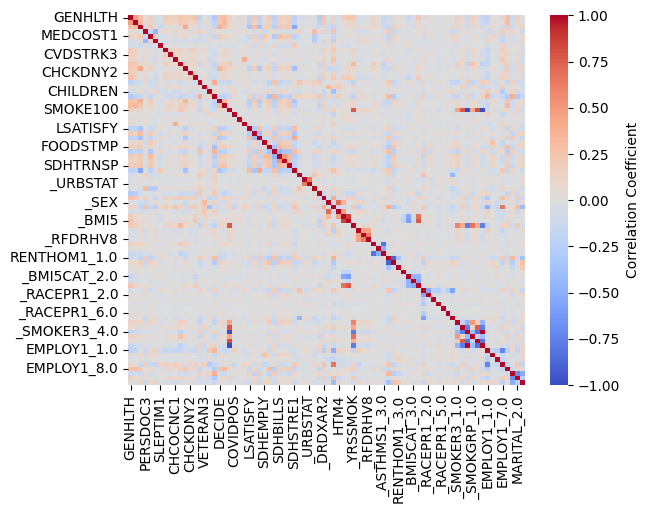

In [130]:
# Correlation matrix using seaborn
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f", cbar_kws={'label': 'Correlation Coefficient'})

In [131]:
# Display Correlation Matrix
#mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
correlation_matrix

,GENHLTH,PHYSHLTH,MENTHLTH,PERSDOC3,MEDCOST1,CHECKUP1,SLEPTIM1,CVDCRHD4,CVDSTRK3,CHCOCNC1,CHCCOPD3,ADDEPEV3,CHCKDNY2,DIABETE4,EDUCA,VETERAN3,CHILDREN,INCOME3,DECIDE,DIFFALON,SMOKE100,COVIDPOS,PREDIAB2,CNCRDIFF,LSATISFY,EMTSUPRT,SDHISOLT,SDHEMPLY,FOODSTMP,SDHFOOD1,SDHBILLS,SDHUTILS,SDHTRNSP,SDHSTRE1,QSTLANG,_METSTAT,_URBSTAT,_HLTHPLN,_TOTINDA,_DRDXAR2,_SEX,_AGE80,HTM4,WTKG3,_BMI5,_YRSSMOK,_RFBING6,_DRNKWK2,_RFDRHV8,_ASTHMS1_1.0,_ASTHMS1_2.0,_ASTHMS1_3.0,RENTHOM1_1.0,RENTHOM1_2.0,RENTHOM1_3.0,_BMI5CAT_1.0,_BMI5CAT_2.0,_BMI5CAT_3.0,_BMI5CAT_4.0,_RACEPR1_1.0,_RACEPR1_2.0,_RACEPR1_3.0,_RACEPR1_4.0,_RACEPR1_5.0,_RACEPR1_6.0,_RACEPR1_7.0,_SMOKER3_1.0,_SMOKER3_3.0,_SMOKER3_4.0,_SMOKGRP_1.0,_SMOKGRP_3.0,_SMOKGRP_4.0,EMPLOY1_1.0,EMPLOY1_3.0,EMPLOY1_5.0,EMPLOY1_7.0,EMPLOY1_8.0,MARITAL_1.0,MARITAL_2.0,MARITAL_5.0
GENHLTH,1.000000,0.489109,0.269978,0.041305,0.150599,-0.066813,-0.065360,0.202601,0.159033,0.120951,0.250001,0.210682,0.179629,0.274191,-0.224678,0.041892,-0.072080,-0.301546,0.252097,0.300457,0.163116,-0.000118,0.060998,0.049427,-0.219758,0.203811,-0.217115,0.062227,0.190110,-0.228007,0.172608,0.133299,0.182331,-0.229120,-0.067805,-0.042262,-0.035674,-0.021298,-0.284209,0.261640,-0.016545,0.125681,-0.060581,0.189655,0.248738,0.217424,-0.051488,-0.035891,-0.028410,0.146283,0.015258,-0.134560,-0.113265,0.105606,0.030601,0.016549,-0.162349,-0.069020,0.221117,-0.069464,0.060382,0.034467,-0.030373,0.000084,0.016149,0.040060,0.139638,0.078364,-0.163116,0.161453,0.071754,-0.163116,-0.217816,0.053955,-0.026761,0.086203,0.286249,-0.130394,0.140882,0.008504
PHYSHLTH,0.489109,1.000000,0.299670,0.051546,0.122744,-0.055318,-0.052072,0.148568,0.126540,0.097343,0.212090,0.194954,0.139773,0.157086,-0.117589,0.026682,-0.052439,-0.208008,0.236397,0.330953,0.114392,0.023927,0.028280,0.047606,-0.211672,0.129428,-0.182533,0.056511,0.163472,-0.186246,0.148838,0.115221,0.172025,-0.207499,-0.012288,-0.025779,-0.019369,0.002585,-0.246235,0.233600,-0.044719,0.088780,-0.051160,0.076196,0.116263,0.156361,-0.049697,-0.028747,-0.018895,0.130726,0.008585,-0.117332,-0.074045,0.068794,0.020508,0.024650,-0.056974,-0.048741,0.097521,-0.007389,0.005001,0.025803,-0.032050,-0.000788,0.017123,0.003643,0.096307,0.056125,-0.114392,0.119669,0.046215,-0.114392,-0.185505,0.040607,-0.018573,0.040518,0.311844,-0.082615,0.107464,-0.015976
MENTHLTH,0.269978,0.299670,1.000000,-0.044178,0.208675,0.048782,-0.128952,0.017972,0.034784,-0.017693,0.091198,0.420123,0.029262,0.030455,-0.089693,-0.041464,0.051134,-0.154848,0.382124,0.248479,0.087581,0.045811,0.012050,-0.017682,-0.345239,0.290960,-0.368046,0.135930,0.165536,-0.238489,0.229987,0.179168,0.215244,-0.540237,0.021347,0.014354,0.015469,-0.055056,-0.114948,0.055427,-0.089821,-0.199886,-0.057017,0.042960,0.083148,0.071313,0.056907,0.031757,0.046452,0.117208,0.034227,-0.120520,-0.190288,0.165361,0.076250,0.023525,-0.017374,-0.061914,0.073165,-0.042535,0.011364,0.025308,-0.015202,0.009970,0.039465,0.028704,0.131107,0.001581,-0.087581,0.073913,0.046665,-0.087581,-0.003469,0.090267,0.044425,-0.146277,0.192760,-0.126982,0.039767,0.122623
PERSDOC3,0.041305,0.051546,-0.044178,1.000000,-0.155508,-0.448573,0.043349,0.065612,0.044503,0.090276,0.050780,0.039848,0.054234,0.097974,0.113732,0.034401,-0.079907,0.064171,-0.016420,0.019690,-0.001842,0.000351,0.038691,0.054152,0.044322,-0.092511,0.069349,-0.102970,-0.017303,0.075091,-0.082045,-0.052457,-0.070438,0.053826,0.142260,-0.002150,-0.001225,0.310103,0.003628,0.151003,-0.107336,0.257421,-0.070137,0.007766,0.044627,0.027061,-0.097258,-0.064486,-0.039574,0.043642,-0.013001,-0.030008,0.172456,-0.154844,-0.058850,-0.021114,-0.034571,-0.000172,0.038758,0.102487,0.006822,-0.022278,-0.029474,-0.004485,-0.017647,-0.124406,-0.074528,0.051745,0.001842,0.000019,-0.001984,0.001842,-0.125644,-0.069586,-0.040795,0.164872,0.033093,0.071166,0.044072,-0.146603
MEDCOST1,0.150599,0.122744,0.208675,-0.155508,1.000000,0.148691,-0.095062,0.000050,0.013441,-0.038479,0.048278,0.135160,-0.000437,0.006170,-0.1141

In [132]:
# Check correlation between multiple smoking features 
X[['SMOKE100', '_YRSSMOK', '_SMOKER3_3.0', '_SMOKGRP_3.0', '_SMOKGRP_4.0']].corr()

,SMOKE100,_YRSSMOK,_SMOKER3_3.0,_SMOKGRP_3.0,_SMOKGRP_4.0
SMOKE100,1.000000,0.766637,0.767371,0.812741,-1.000000
_YRSSMOK,0.766637,1.000000,0.411332,0.395211,-0.766637
_SMOKER3_3.0,0.767371,0.411332,1.000000,0.764793,-0.767371
_SMOKGRP_3.0,0.812741,0.395211,0.764793,1.000000,-0.812741
_SMOKGRP_4.0,-1.000000,-0.766637,-0.767371,-0.812741,1.000000


In [122]:
# Multicollinearity check using VIF
columns_to_drop=['SMOKE100', '_YRSSMOK', 'RENTHOM1_2.0', '_ASTHMS1_1.0', '_BMI5CAT_4.0', '_RACEPR1_1.0', 'MARITAL_1.0','_SMOKGRP_4.0', '_SMOKER3_1.0', '_SMOKER3_3.0', '_SMOKER3_4.0', 'EMPLOY1_1.0']

X_VIF = X.drop(columns=columns_to_drop)
vif_data = pd.DataFrame()
vif_data["feature"] = X_VIF.columns
vif_data["VIF"] = [variance_inflation_factor(X_VIF.values, i) for i in range(len(X_VIF.columns))]
print(vif_data) 

         feature         VIF
0        GENHLTH   11.960457
1       PHYSHLTH    1.885630
2       MENTHLTH    2.212853
3       PERSDOC3   12.051165
4       MEDCOST1   69.381634
5       CHECKUP1    4.505316
6       SLEPTIM1   27.557059
7       CVDCRHD4   74.146730
8       CVDSTRK3  103.723702
9       CHCOCNC1   42.520556
10      CHCCOPD3   65.463320
11      ADDEPEV3   27.720394
12      CHCKDNY2   94.237436
13      DIABETE4    1.415199
14         EDUCA   40.701361
15      VETERAN3   38.752443
16      CHILDREN    1.595938
17       INCOME3   19.879500
18        DECIDE   51.801472
19      DIFFALON   78.921920
20      COVIDPOS    1.564207
21      PREDIAB2    1.076820
22      CNCRDIFF    1.243035
23      LSATISFY   24.872044
24      EMTSUPRT    5.680744
25      SDHISOLT   23.618983
26      SDHEMPLY   55.532876
27      FOODSTMP   67.924280
28      SDHFOOD1   57.596170
29      SDHBILLS   86.747454
30      SDHUTILS  106.212693
31      SDHTRNSP   92.888415
32      SDHSTRE1   23.473865
33       QSTLA

In [133]:
#### Save the final dataset to be used for modeling
BRFSS2022_modeling_data=BRFSS2022_nona_encoded.drop(columns=columns_to_drop)
BRFSS2022_modeling_data.to_pickle('../data/BRFSS2022_modeling_data.pkl')